# River Slope Tests

This shows an example how to calculate the slope of a triangle given its vertices in 3D space. This is used for rivers which are dissected into triangles.

Some useful links:

Tests for calculating triangle slopes. See: https://gamedev.stackexchange.com/questions/105850/calculate-the-slope-of-a-3d-triangle  
More on planes: https://math.libretexts.org/Bookshelves/Calculus/Calculus_3e_(Apex)/10%3A_Vectors/10.06%3A_Planes  
Very helpful examples: https://mathsathome.com/vector-perpendicular-to-plane/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from shapely import Polygon

In [2]:
# test data
test_data = [
    Polygon([(0, 2, 3), (1, 1, 0), (0, 0, 0)]),
    Polygon([(0, 0, -1), (0, 1.1, 0.5), (-1, 1, 0)]),
    Polygon([(0, 0, 1), (-1, 0, 0), (-1, 1, 0)]),
    Polygon([(0, 0, 0.5), (-1, -1, 0), (0, -1, 0)]),
    Polygon([(1, 1, 3), (2, -3, 0), (1, -1, 0)]),
    Polygon([(34.6, 45.2, 365.2), (33.5, 44.6, 362.1), (35.9, 47.9, 364.4)]),
]

1 degrees 64.7605981793211 percent 212.13203435596424
2 degrees 54.67967070414837 percent 141.1288608750911
3 degrees 45.0 percent 99.99999999999999
4 degrees 26.565051177077994 percent 50.0
5 degrees 73.39845040097975 percent 335.4101966249683
6 degrees 77.79023550366362 percent 462.13700290445246


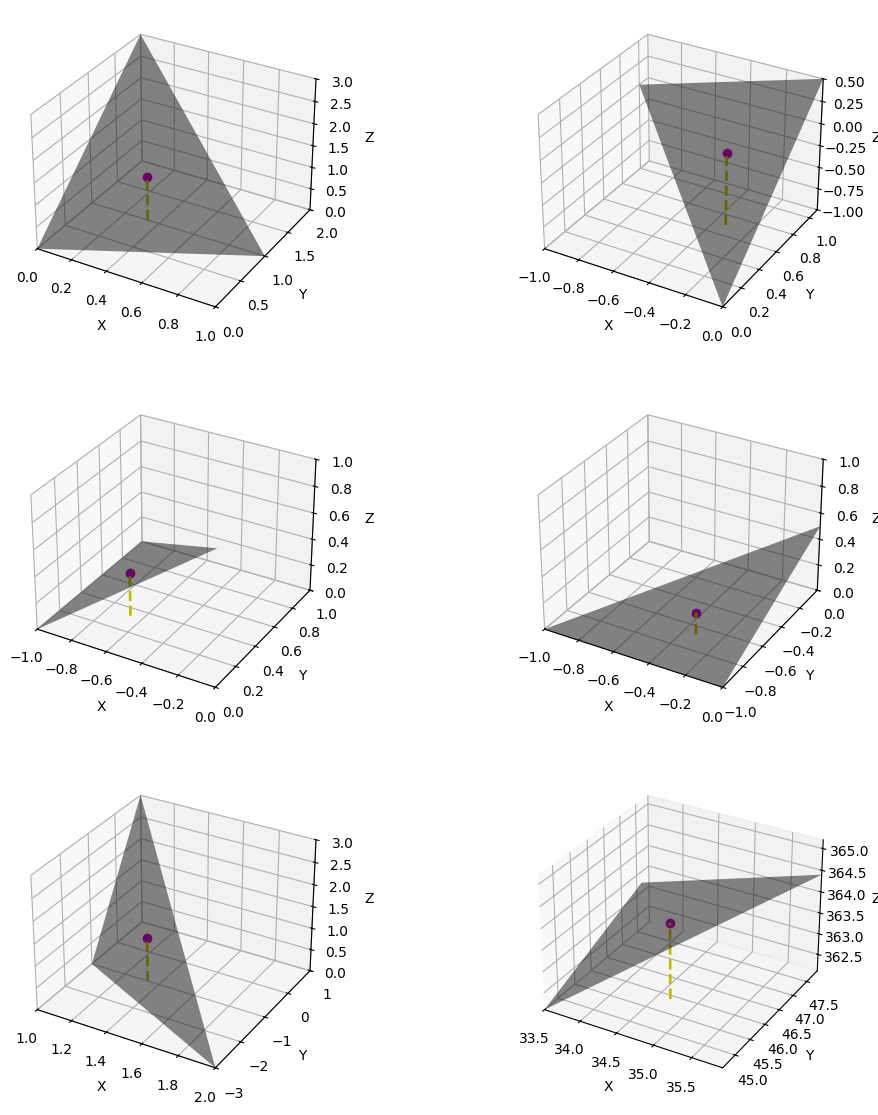

In [46]:
# plot 3D triangles
fig = plt.figure(figsize=(12, 14))

# normal vector in the direction of the ground
nf = np.array([0, 0, 1])

for i, poly in enumerate(test_data):
    data = np.array(np.array(poly.normalize().exterior.coords[:-1])) # get coordinates of the polygon vertices in 3D space - we normalize the polygon coordinate order
    
    # create two vectors starting from the highest point to the other two points
    vector_u = data[1] - data[0]
    vector_v = data[2] - data[0]
    
    # calculate the cross product to get the normal
    vector_n = np.cross(vector_u, vector_v)
    # normalize vector
    ne = vector_n / np.linalg.norm(vector_n)
    
    # calculate the angle between the two planes
    angle_between_vectors = np.pi - np.abs(np.arccos(np.dot(ne, nf)))
    print((i+1), "degrees", np.degrees(angle_between_vectors), "percent", np.tan(angle_between_vectors)*100)
    
    ax = fig.add_subplot(len(test_data)//2, 2, i+1, projection='3d')
    ax.set(xlabel='X', ylabel='Y', zlabel='Z')
    mins = np.min(data, axis=0)
    maxs = np.max(data, axis=0)
    for i in range(len(mins)):  # minimum axis
        if maxs[i] - mins[i] < 1.:
            maxs[i] = mins[i] + 1.
    ax.set_xlim([mins[0], maxs[0]])
    ax.set_ylim([mins[1], maxs[1]])
    ax.set_zlim([mins[2], maxs[2]])
    
    # add triangle
    ax.add_collection3d(Poly3DCollection([data], facecolors='#0f0f0f80'))
    # display normal from the highest point
    mean_point = ((data[0][0] + data[1][0] + data[2][0]) / 3, (data[0][1] + data[1][1] + data[2][1]) / 3, (data[0][2] + data[1][2] + data[2][2]) / 3)
    ax.plot(mean_point[0], mean_point[1], mean_point[2], 'mo') # highest point is yellow
    
    # plot line from the highest point to minimum in coordinate system
    ax.plot3D([mean_point[0], mean_point[0]], [mean_point[1], mean_point[1]], [np.min(data, axis=0)[2], mean_point[2]], 'y--', linewidth=2)
